# **Project Name**    - Flipkart Customer Support CSAT Analysis


##### **Project Type**    - EDA
##### **Contribution**    - Individual ( Rohit Kumar)


# **Project Summary -**

This project analyzes Flipkart customer support data to understand what drives customer satisfaction (CSAT).

The dataset has 85,907 support records and includes channel, issue category, sub-category, timestamps, agent details, shift, tenure, and CSAT score. I started by checking data quality, then handled missing values, converted date columns, and created useful features such as response time in minutes and a low-CSAT flag (CSAT <= 3).

Key observations from EDA:
- CSAT is generally high, but around 17.5% tickets are still low-CSAT.
- Email channel has lower average CSAT compared to Inbound and Outcall.
- On Job Training agents have lower CSAT than experienced agents.
- Some categories like Cancellation, Product Queries, and Order Related have higher dissatisfaction risk.
- As response time increases, CSAT clearly decreases.

Based on these findings, the focus should be on faster response, better handling for high-risk categories, and stronger support for new agents.

Suggested actions:
1. Use SLA-based alerts for delayed tickets.
2. Build clear handling guides for high-risk categories.
3. Provide extra coaching for early-tenure agents.
4. Track low-CSAT rate weekly by channel, shift, category, and tenure.

This is an intern-level but practical analysis that converts raw support data into clear improvement steps.


# **GitHub Link -**

GitHub Link: NA (submitted as local internship notebook).


# **Problem Statement**


Flipkart receives a high volume of customer support tickets across multiple channels. Even with good overall CSAT, low ratings are still present in specific issue types. The goal is to find where low CSAT is concentrated and identify the main drivers such as response delay, issue type, shift, and agent tenure.


#### **Define Your Business Objective?**

Business objective: improve CSAT consistency by reducing low-CSAT tickets. The main levers are faster response, focused improvement in high-risk categories, and better quality support for new agents.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [57]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


### Dataset Loading

In [58]:
# Load Dataset
df = pd.read_csv("Customer_support_data.csv")
print("Shape:", df.shape)
df.head()


Shape: (85907, 20)


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset First View

In [59]:
# Dataset First Look
df.sample(5, random_state=42)


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
67871,fc42f862-7521-472c-b569-8bce866ebe8c,Inbound,Returns,Fraudulent User,NaN,111a13cc-161e-4605-bf68-4e85d2e780c8,NaN,26/08/2023 18:39,26/08/2023 18:48,26-Aug-23,NaN,NaN,NaN,NaN,Brittney Key,Mia Yamamoto,Jennifer Nguyen,On Job Training,Morning,5
40187,a7bb8900-a120-430f-b573-55ed6c16faab,Inbound,Returns,Reverse Pickup Enquiry,Retain employees like this guy. Short and simp...,cbe87ffe-fb02-4f58-97a0-b4f9868d8d6a,09/08/2023 11:15,14/08/2023 00:32,14/08/2023 00:37,14-Aug-23,MUMBAI,Books & General merchandise,156.0,NaN,Jacqueline Meadows,Ethan Nakamura,Emily Chen,0-30,Evening,5
60075,b697f809-0d10-4839-9ccd-152ab6a179f4,Outcall,Returns,Reverse Pickup Enquiry,NaN,3fe3922c-8eac-4274-b1d4-2e10ce94570c,NaN,22/08/2023 20:48,23/08/2023 15:54,23-Aug-23,NaN,NaN,NaN,NaN,Craig Henderson,Brayden Wong,John Smith,>90,Evening,5
69560,8952de8c-48fc-4c9b-b65e-bda8c531e2d5,Inbound,Payments related,Online Payment Issues,Trusted 100/,4bf4fd66-49dc-4a90-8b58-3cd64c9a3aaf,NaN,26/08/2023 23:47,26/08/2023 23:55,26-Aug-23,NaN,NaN,NaN,NaN,Samantha Swanson,Ava Wong,William Kim,On Job Training,Evening,5
2605,fc1c67bc-cb0d-444e-a6da-e5fa6392083b,Inbound,Returns,Reverse Pickup Enquiry,NaN,4e97c673-9132-48cd-a5f4-07b1e292377f,27/07/2023 21:36,01/08/2023 18:37,01/08/2023 18:38,01-Aug-23,PATNA,LifeStyle,294.0,NaN,Stephen Morris,Wyatt Kim,Michael Lee,>90,Evening,5


### Dataset Rows & Columns count

In [60]:
# Dataset Rows & Columns count
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


Rows: 85907
Columns: 20


### Dataset Information

In [61]:
# Dataset Info
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  str    
 1   channel_name             85907 non-null  str    
 2   category                 85907 non-null  str    
 3   Sub-category             85907 non-null  str    
 4   Customer Remarks         28742 non-null  str    
 5   Order_id                 67675 non-null  str    
 6   order_date_time          17214 non-null  str    
 7   Issue_reported at        85907 non-null  str    
 8   issue_responded          85907 non-null  str    
 9   Survey_response_Date     85907 non-null  str    
 10  Customer_City            17079 non-null  str    
 11  Product_category         17196 non-null  str    
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name               85907 no

#### Duplicate Values

In [62]:
# Dataset Duplicate Value Count
df.duplicated().sum()


np.int64(0)

#### Missing Values/Null Values

In [63]:
# Missing Values/Null Values Count
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


connected_handling_time    85665
Customer_City              68828
Product_category           68711
Item_price                 68701
order_date_time            68693
Customer Remarks           57165
Order_id                   18232
dtype: int64

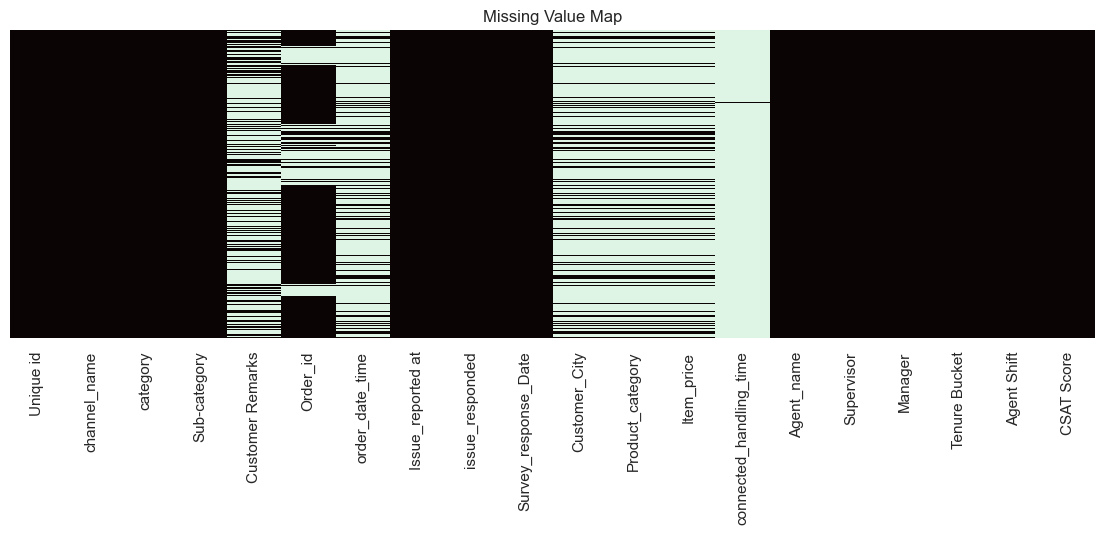

In [64]:
# Visualizing the missing values
plt.figure(figsize=(14, 4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="mako")
plt.title("Missing Value Map")
plt.show()


### What did you know about your dataset?

The dataset has 85,907 rows and 20 columns related to support operations.

What I found:
- No duplicate rows.
- High missing values in `connected_handling_time`, `order_date_time`, `Item_price`, `Product_category`, and `Customer_City`.
- Time fields like `Issue_reported at` and `issue_responded` are available and useful for response analysis.
- CSAT is skewed toward score 5, but low scores (1 to 3) are still meaningful for business risk.

Overall, the dataset is usable for EDA after basic cleaning and feature engineering.


## ***2. Understanding Your Variables***

In [65]:
# Dataset Columns
df.columns.tolist()


['Unique id',
 'channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'Order_id',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Item_price',
 'connected_handling_time',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift',
 'CSAT Score']

In [66]:
# Dataset Describe
df.describe(include="all").transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unique id,85907,85907,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_name,85907,3,Inbound,68142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,85907,12,Returns,44097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-category,85907,57,Reverse Pickup Enquiry,22389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Remarks,28742,18231,Good,1390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_id,67675,67675,c27c9bb4-fa36-4140-9f1f-21009254ffdb,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date_time,17214,13766,09/08/2023 11:55,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Issue_reported at,85907,30923,13/08/2023 10:40,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
issue_responded,85907,30262,28/08/2023 00:00,3378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Survey_response_Date,85907,31,28-Aug-23,3452,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

Main variable groups:
- ID fields: `Unique id`, `Order_id`
- Issue details: `channel_name`, `category`, `Sub-category`, `Customer Remarks`
- Time fields: `order_date_time`, `Issue_reported at`, `issue_responded`, `Survey_response_Date`
- Customer/product fields: `Customer_City`, `Product_category`, `Item_price`
- Agent fields: `Agent_name`, `Supervisor`, `Manager`, `Tenure Bucket`, `Agent Shift`
- Target field: `CSAT Score`


### Check Unique Values for each variable.

In [67]:
# Check Unique Values for each variable.
for col in df.columns:
    print(f"{col}: {df[col].nunique(dropna=True)} unique values")


Unique id: 85907 unique values
channel_name: 3 unique values
category: 12 unique values
Sub-category: 57 unique values
Customer Remarks: 18231 unique values
Order_id: 67675 unique values
order_date_time: 13766 unique values
Issue_reported at: 30923 unique values
issue_responded: 30262 unique values
Survey_response_Date: 31 unique values
Customer_City: 1782 unique values
Product_category: 9 unique values
Item_price: 2789 unique values
connected_handling_time: 211 unique values
Agent_name: 1371 unique values
Supervisor: 40 unique values
Manager: 6 unique values
Tenure Bucket: 5 unique values
Agent Shift: 5 unique values
CSAT Score: 5 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [68]:
# Write your code to make your dataset analysis ready.
df = df.copy()
df.columns = df.columns.str.strip()

# Convert blank strings to NaN for object columns
obj_cols = df.select_dtypes(include="object").columns
for col in obj_cols:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].replace({"": np.nan, "nan": np.nan, "None": np.nan})

# Type conversion
df["CSAT Score"] = pd.to_numeric(df["CSAT Score"], errors="coerce")
df["Item_price"] = pd.to_numeric(df["Item_price"], errors="coerce")
df["connected_handling_time"] = pd.to_numeric(df["connected_handling_time"], errors="coerce")

# Datetime parsing
df["Issue_reported_dt"] = pd.to_datetime(df["Issue_reported at"], format="%d/%m/%Y %H:%M", errors="coerce")
df["issue_responded_dt"] = pd.to_datetime(df["issue_responded"], format="%d/%m/%Y %H:%M", errors="coerce")
df["Survey_response_Date_dt"] = pd.to_datetime(df["Survey_response_Date"], format="%d-%b-%y", errors="coerce")
df["order_date_time_dt"] = pd.to_datetime(df["order_date_time"], dayfirst=True, errors="coerce")

# Feature engineering
df["response_time_min"] = (df["issue_responded_dt"] - df["Issue_reported_dt"]).dt.total_seconds() / 60

# Drop impossible negative response times caused by malformed responses (for example midnight defaults)
df.loc[df["response_time_min"] < 0, "response_time_min"] = np.nan

df["issue_hour"] = df["Issue_reported_dt"].dt.hour
df["issue_weekday"] = df["Issue_reported_dt"].dt.day_name()
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["issue_weekday"] = pd.Categorical(df["issue_weekday"], categories=weekday_order, ordered=True)

df["is_low_csat"] = (df["CSAT Score"] <= 3).astype(int)
df["has_remarks"] = df["Customer Remarks"].notna().astype(int)

print("Cleaned shape:", df.shape)
print("Low CSAT rate (%):", round(df["is_low_csat"].mean() * 100, 2))
df[["CSAT Score", "response_time_min", "Item_price", "issue_hour", "is_low_csat"]].head()


Cleaned shape: (85907, 29)
Low CSAT rate (%): 17.54


,CSAT Score,response_time_min,Item_price,issue_hour,is_low_csat
0,5,34.0,NaN,11,0
1,5,2.0,NaN,12,0
2,5,22.0,NaN,20,0
3,5,20.0,NaN,20,0
4,5,2.0,NaN,10,0


### What all manipulations have you done and insights you found?

Data preparation done:
- Cleaned blank values in text columns.
- Converted `CSAT Score`, `Item_price`, and `connected_handling_time` to numeric.
- Converted date/time columns to datetime format.
- Created new fields: `response_time_min`, `issue_hour`, `issue_weekday`, `is_low_csat`, `has_remarks`.
- Removed negative response times from analysis.

Insight from wrangling:
- Even with missing values in some columns, enough fields are available for strong CSAT analysis.
- Response-time feature is highly useful for business insights.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

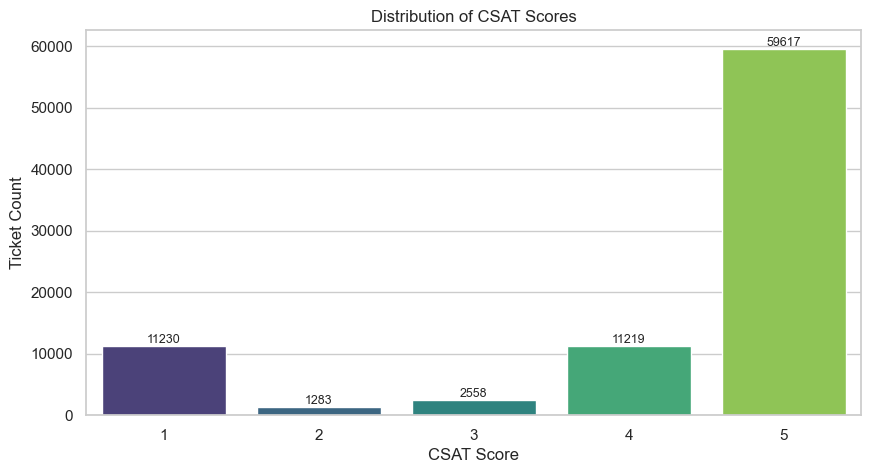

In [69]:
# Chart - 1 visualization code
ax = sns.countplot(data=df, x="CSAT Score", palette="viridis")
plt.title("Distribution of CSAT Scores")
plt.xlabel("CSAT Score")
plt.ylabel("Ticket Count")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=9)
plt.show()


##### 1. Why did you pick the specific chart?

I used a count plot because CSAT is a score from 1 to 5 and this chart clearly shows how many tickets fall in each score.


##### 2. What is/are the insight(s) found from the chart?

CSAT score 5 has the highest count, while scores 1 to 3 together are around 17.5% of tickets.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It shows strong overall performance, but the low-CSAT segment is still large enough to affect customer trust and repeat support load.


#### Chart - 2

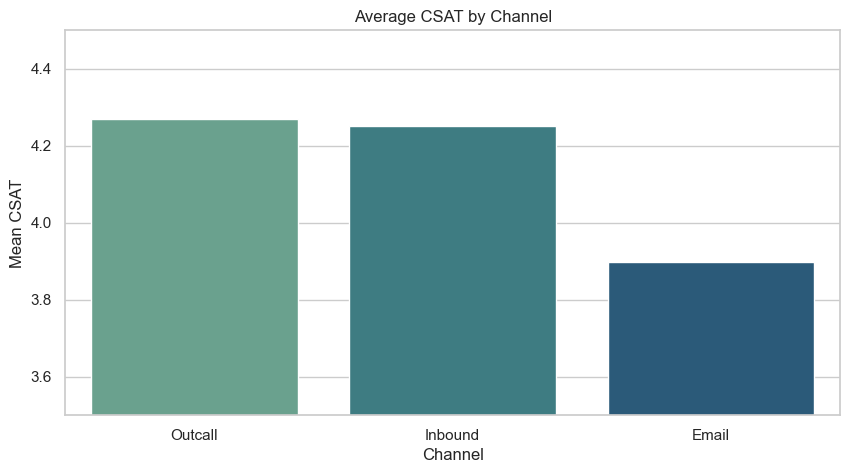

In [70]:
# Chart - 2 visualization code
tmp = df.groupby("channel_name", as_index=False)["CSAT Score"].mean().sort_values("CSAT Score", ascending=False)
sns.barplot(data=tmp, x="channel_name", y="CSAT Score", palette="crest")
plt.title("Average CSAT by Channel")
plt.xlabel("Channel")
plt.ylabel("Mean CSAT")
plt.ylim(3.5, 4.5)
plt.show()


##### 1. Why did you pick the specific chart?

I used a bar chart to compare average CSAT across channels in a simple way.


##### 2. What is/are the insight(s) found from the chart?

Email has the lowest average CSAT, while Inbound and Outcall are better.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Channel-level actions, especially for Email, can directly improve satisfaction.


#### Chart - 3

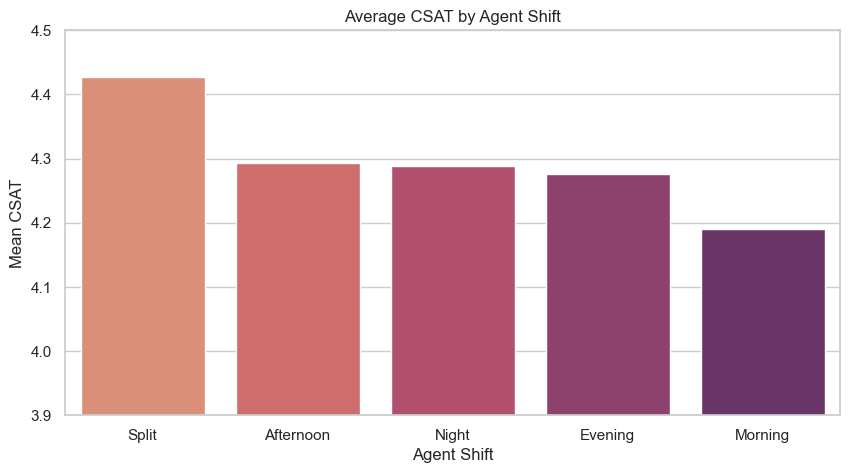

In [71]:
# Chart - 3 visualization code
tmp = df.groupby("Agent Shift", as_index=False)["CSAT Score"].mean().sort_values("CSAT Score", ascending=False)
sns.barplot(data=tmp, x="Agent Shift", y="CSAT Score", palette="flare")
plt.title("Average CSAT by Agent Shift")
plt.xlabel("Agent Shift")
plt.ylabel("Mean CSAT")
plt.ylim(3.9, 4.5)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is suitable to compare CSAT across different agent shifts.


##### 2. What is/are the insight(s) found from the chart?

Morning shift shows weaker performance than other shifts.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Shift-wise monitoring and staffing changes can reduce dissatisfaction.


#### Chart - 4

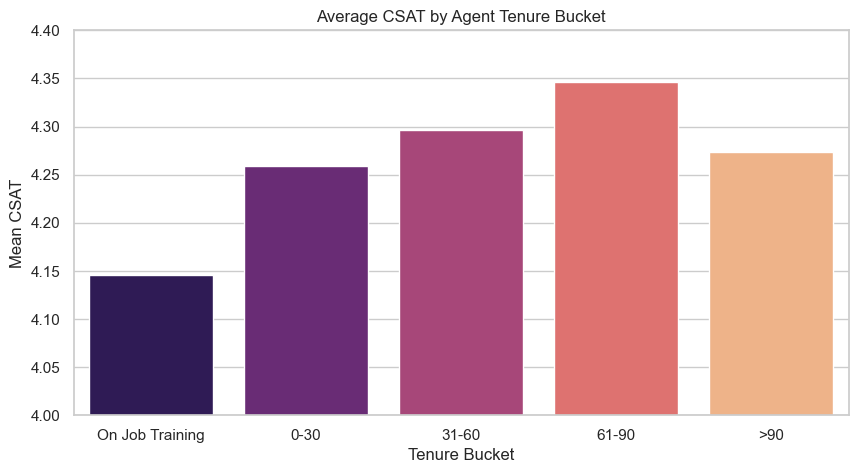

In [72]:
# Chart - 4 visualization code
tenure_order = ["On Job Training", "0-30", "31-60", "61-90", ">90"]
tmp = df.groupby("Tenure Bucket", as_index=False)["CSAT Score"].mean()
tmp["Tenure Bucket"] = pd.Categorical(tmp["Tenure Bucket"], categories=tenure_order, ordered=True)
tmp = tmp.sort_values("Tenure Bucket")
sns.barplot(data=tmp, x="Tenure Bucket", y="CSAT Score", palette="magma")
plt.title("Average CSAT by Agent Tenure Bucket")
plt.xlabel("Tenure Bucket")
plt.ylabel("Mean CSAT")
plt.ylim(4.0, 4.4)
plt.show()


##### 1. Why did you pick the specific chart?

Tenure is categorical, so a bar chart is good for comparing average CSAT by tenure bucket.


##### 2. What is/are the insight(s) found from the chart?

On Job Training agents have lower CSAT than more experienced agents.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Extra coaching for new agents can improve first-contact quality.


#### Chart - 5

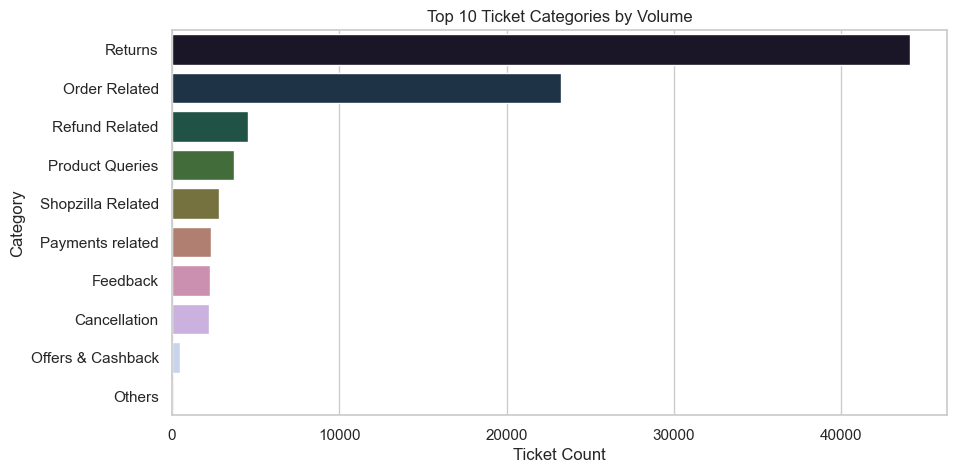

In [73]:
# Chart - 5 visualization code
top_cat = df["category"].value_counts().head(10).index
sns.countplot(data=df[df["category"].isin(top_cat)], y="category", order=top_cat, palette="cubehelix")
plt.title("Top 10 Ticket Categories by Volume")
plt.xlabel("Ticket Count")
plt.ylabel("Category")
plt.show()


##### 1. Why did you pick the specific chart?

I used a count plot to identify high-volume categories that need attention first.


##### 2. What is/are the insight(s) found from the chart?

Returns and Order Related categories have the highest ticket volume.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Improving high-volume categories gives larger business impact.


#### Chart - 6

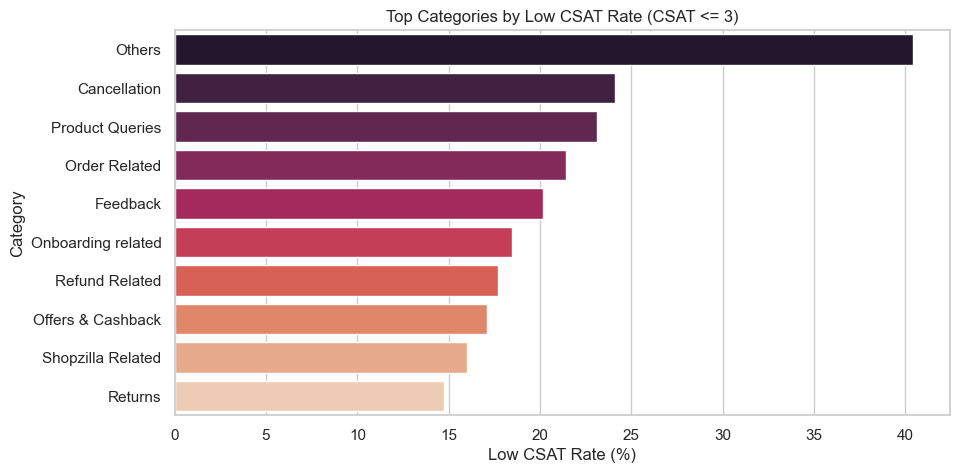

In [74]:
# Chart - 6 visualization code
tmp = df.groupby("category", as_index=False)["is_low_csat"].mean()
tmp["low_csat_pct"] = tmp["is_low_csat"] * 100
tmp = tmp.sort_values("low_csat_pct", ascending=False).head(10)
sns.barplot(data=tmp, x="low_csat_pct", y="category", palette="rocket")
plt.title("Top Categories by Low CSAT Rate (CSAT <= 3)")
plt.xlabel("Low CSAT Rate (%)")
plt.ylabel("Category")
plt.show()


##### 1. Why did you pick the specific chart?

I used low-CSAT rate by category because it directly shows dissatisfaction risk.


##### 2. What is/are the insight(s) found from the chart?

Cancellation, Product Queries, and Order Related have higher low-CSAT rates.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These categories should be prioritized for faster and better handling.


#### Chart - 7

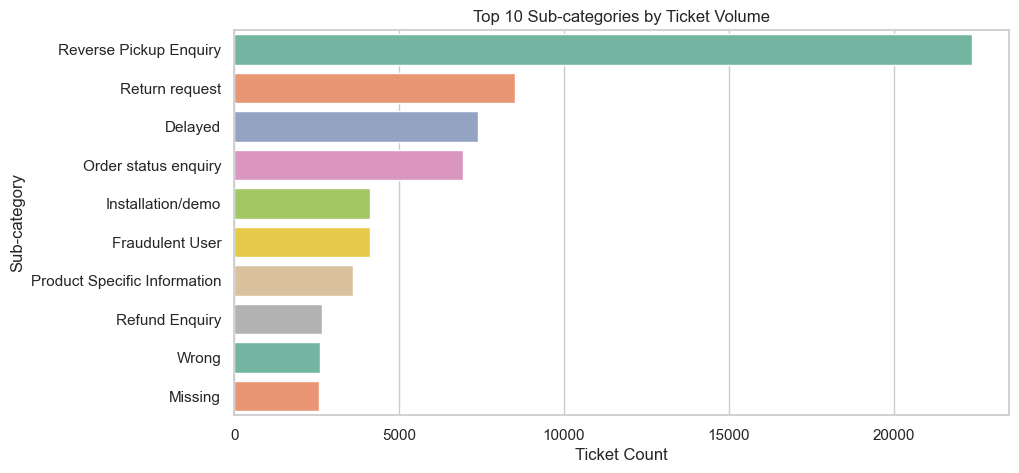

In [75]:
# Chart - 7 visualization code
top_sub = df["Sub-category"].value_counts().head(10).index
sns.countplot(data=df[df["Sub-category"].isin(top_sub)], y="Sub-category", order=top_sub, palette="Set2")
plt.title("Top 10 Sub-categories by Ticket Volume")
plt.xlabel("Ticket Count")
plt.ylabel("Sub-category")
plt.show()


##### 1. Why did you pick the specific chart?

Sub-category volume analysis gives more detailed insight than category-level analysis.


##### 2. What is/are the insight(s) found from the chart?

Reverse Pickup Enquiry is the largest sub-category, followed by Return request and Delayed issues.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This helps decide where process improvements should start.


#### Chart - 8

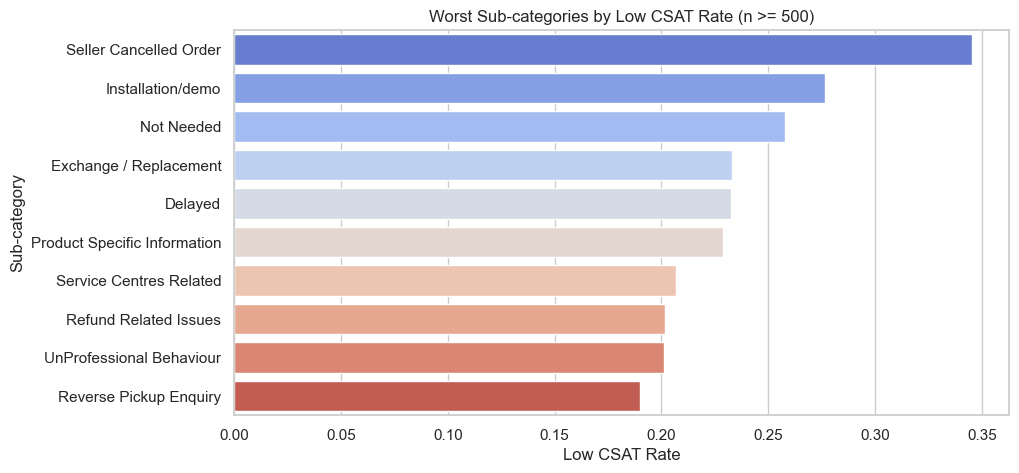

In [76]:
# Chart - 8 visualization code
tmp = (
    df.groupby("Sub-category")
      .agg(ticket_count=("CSAT Score", "count"), low_rate=("is_low_csat", "mean"))
      .reset_index()
)
tmp = tmp[tmp["ticket_count"] >= 500].sort_values("low_rate", ascending=False).head(10)
sns.barplot(data=tmp, x="low_rate", y="Sub-category", palette="coolwarm")
plt.title("Worst Sub-categories by Low CSAT Rate (n >= 500)")
plt.xlabel("Low CSAT Rate")
plt.ylabel("Sub-category")
plt.show()


##### 1. Why did you pick the specific chart?

I used this chart to compare risk across sub-categories with enough ticket volume.


##### 2. What is/are the insight(s) found from the chart?

Seller Cancelled Order, Installation/demo, and Delayed sub-categories show higher low-CSAT risk.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These pain points need proactive communication and faster resolution.


#### Chart - 9

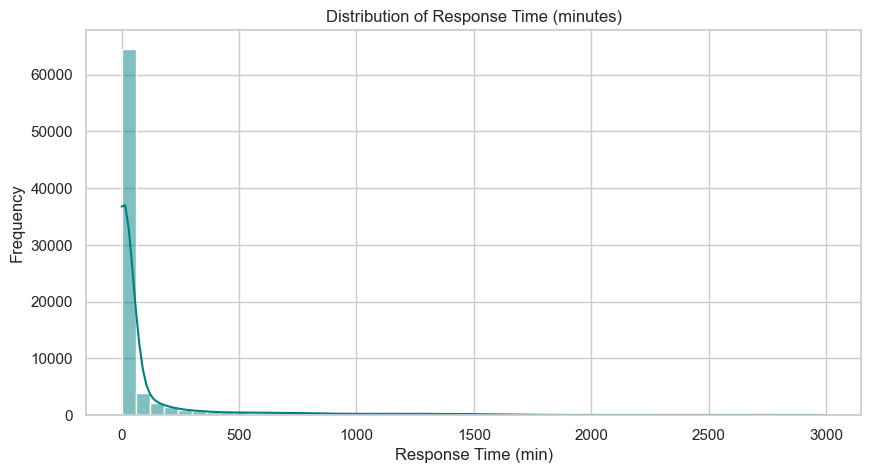

In [77]:
# Chart - 9 visualization code
rt = df["response_time_min"].dropna()
rt = rt[(rt >= 0) & (rt <= 3000)]
sns.histplot(rt, bins=50, kde=True, color="teal")
plt.title("Distribution of Response Time (minutes)")
plt.xlabel("Response Time (min)")
plt.ylabel("Frequency")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram is suitable for checking the spread and skew of response time.


##### 2. What is/are the insight(s) found from the chart?

Response time is right-skewed: most tickets are quick, but some are heavily delayed.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Reducing delayed tickets can improve CSAT meaningfully.


#### Chart - 10

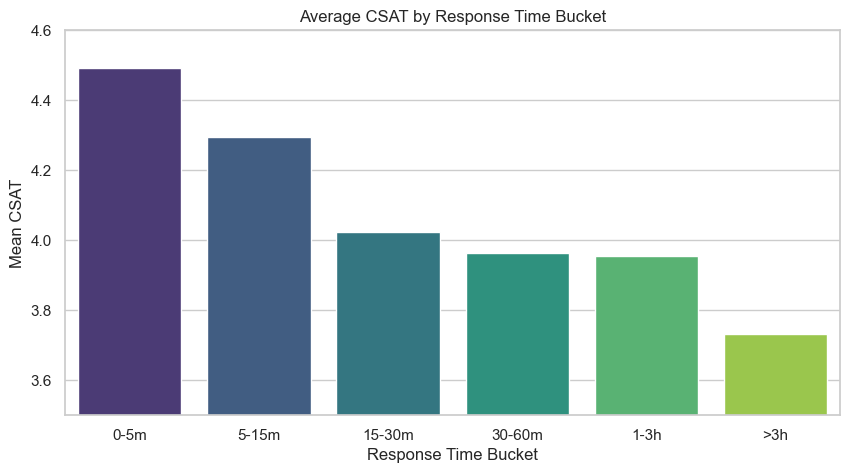

In [78]:
# Chart - 10 visualization code
bins = [0, 5, 15, 30, 60, 180, np.inf]
labels = ["0-5m", "5-15m", "15-30m", "30-60m", "1-3h", ">3h"]
df["response_bin"] = pd.cut(df["response_time_min"], bins=bins, labels=labels, right=False)

tmp = df.groupby("response_bin", observed=False)["CSAT Score"].mean().reset_index()
sns.barplot(data=tmp, x="response_bin", y="CSAT Score", palette="viridis")
plt.title("Average CSAT by Response Time Bucket")
plt.xlabel("Response Time Bucket")
plt.ylabel("Mean CSAT")
plt.ylim(3.5, 4.6)
plt.show()


##### 1. Why did you pick the specific chart?

Response-time buckets make it easy to explain how delay affects CSAT.


##### 2. What is/are the insight(s) found from the chart?

Average CSAT is highest for very fast responses and drops as response time increases.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This supports using response-time SLA as a core quality KPI.


#### Chart - 11

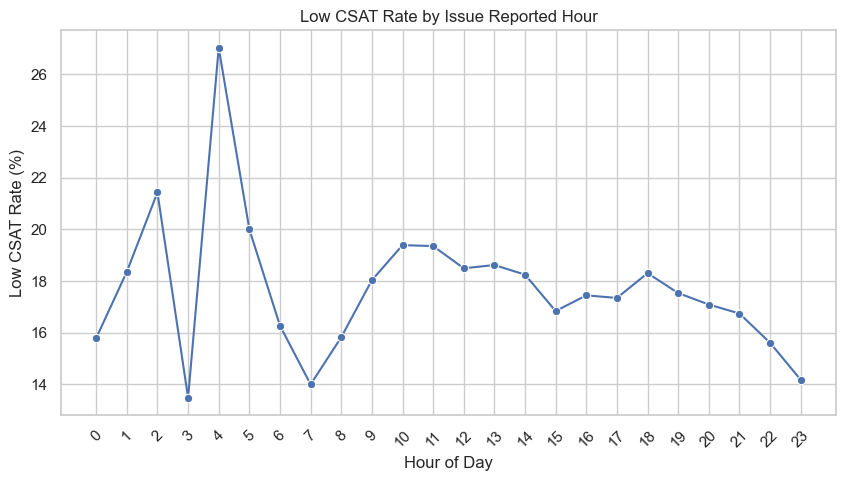

In [79]:
# Chart - 11 visualization code
tmp = df.groupby("issue_hour", as_index=False)["is_low_csat"].mean()
tmp["low_csat_pct"] = tmp["is_low_csat"] * 100
sns.lineplot(data=tmp, x="issue_hour", y="low_csat_pct", marker="o")
plt.title("Low CSAT Rate by Issue Reported Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Low CSAT Rate (%)")
plt.xticks(range(0, 24, 1), rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A line plot is useful to show hourly trend in low-CSAT rate.


##### 2. What is/are the insight(s) found from the chart?

Late morning and early afternoon show relatively higher low-CSAT rates.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Hour-wise staffing and queue balancing can help.


#### Chart - 12

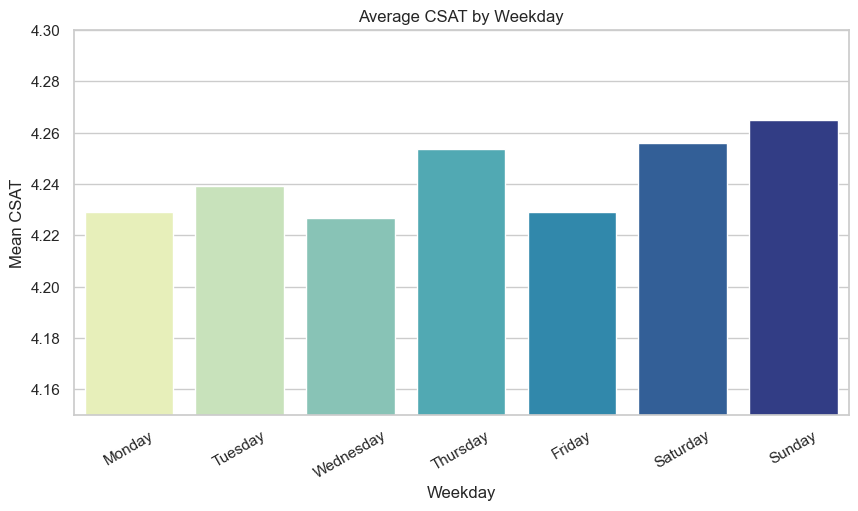

In [80]:
# Chart - 12 visualization code
tmp = df.groupby("issue_weekday", as_index=False)["CSAT Score"].mean()
sns.barplot(data=tmp, x="issue_weekday", y="CSAT Score", palette="YlGnBu")
plt.title("Average CSAT by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Mean CSAT")
plt.ylim(4.15, 4.30)
plt.xticks(rotation=30)
plt.show()


##### 1. Why did you pick the specific chart?

A weekday bar chart helps compare performance across days.


##### 2. What is/are the insight(s) found from the chart?

Weekday differences are small, with slightly better CSAT on Sunday.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This helps in weekly roster planning and monitoring.


#### Chart - 13

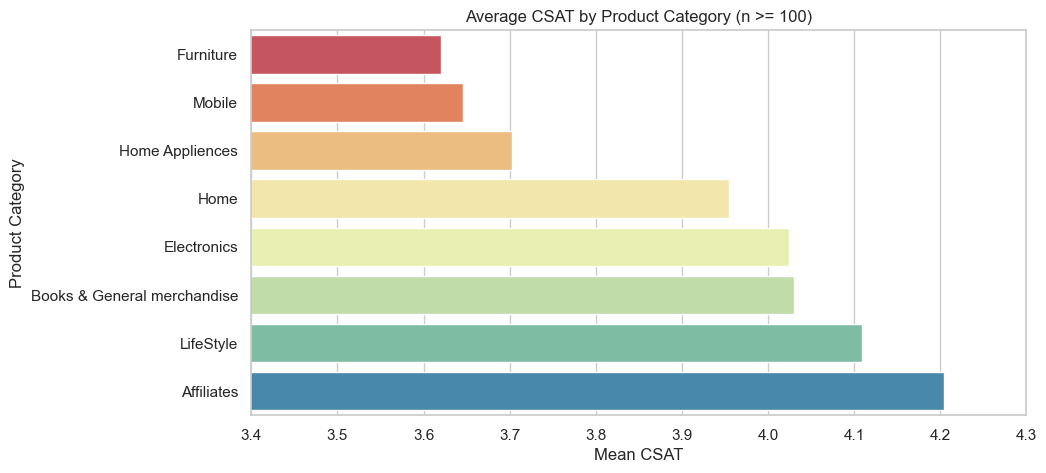

In [81]:
# Chart - 13 visualization code
tmp = (
    df[df["Product_category"].notna()]
      .groupby("Product_category")
      .agg(mean_csat=("CSAT Score", "mean"), ticket_count=("CSAT Score", "count"))
      .reset_index()
)
tmp = tmp[tmp["ticket_count"] >= 100].sort_values("mean_csat")
sns.barplot(data=tmp, x="mean_csat", y="Product_category", palette="Spectral")
plt.title("Average CSAT by Product Category (n >= 100)")
plt.xlabel("Mean CSAT")
plt.ylabel("Product Category")
plt.xlim(3.4, 4.3)
plt.show()


##### 1. Why did you pick the specific chart?

I used this chart to compare product categories and identify difficult segments.


##### 2. What is/are the insight(s) found from the chart?

Furniture, Mobile, and Home Appliances show lower average CSAT than other categories.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Product-specific handling steps can improve these weaker segments.


#### Chart - 14 - Correlation Heatmap

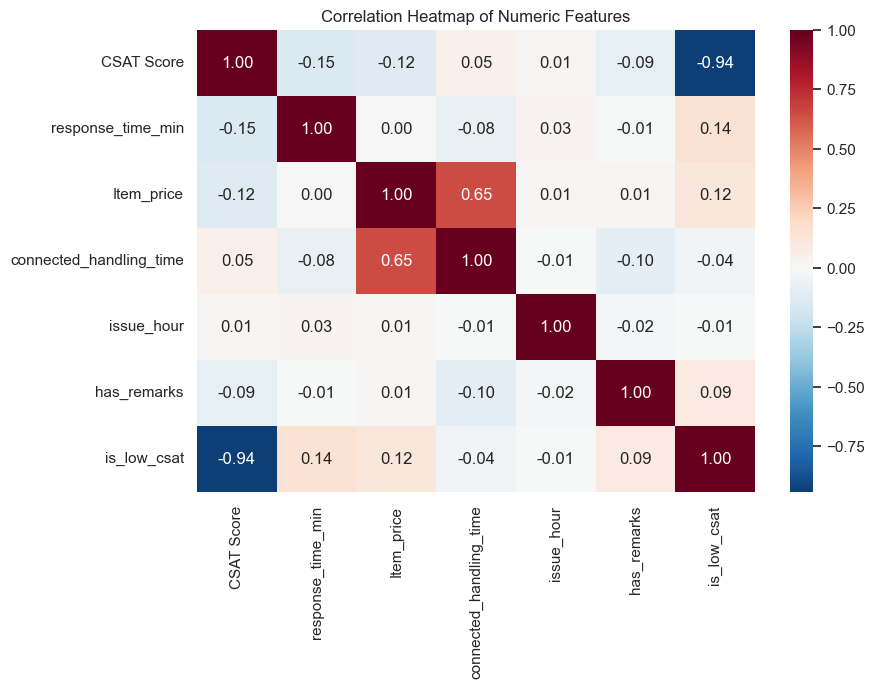

In [82]:
# Correlation Heatmap visualization code
num_cols = ["CSAT Score", "response_time_min", "Item_price", "connected_handling_time", "issue_hour", "has_remarks", "is_low_csat"]
heat_df = df[num_cols].copy()

corr = heat_df.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu_r", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap provides a quick view of relationships between numeric variables.


##### 2. What is/are the insight(s) found from the chart?

It shows that higher response time is linked with lower CSAT and higher low-CSAT probability.


#### Chart - 15 - Pair Plot

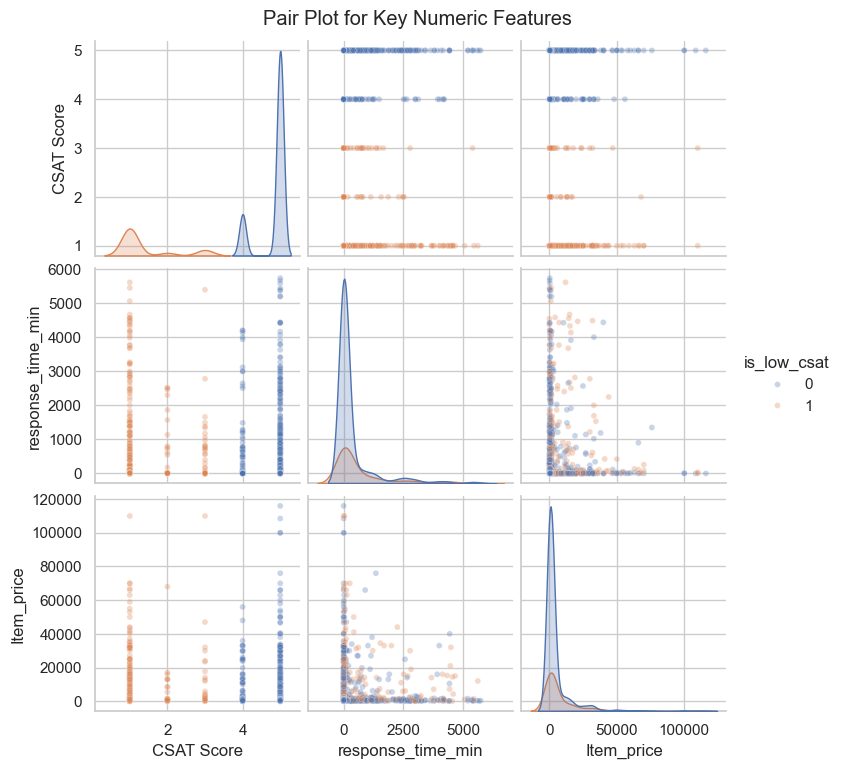

In [83]:
# Pair Plot visualization code
pair_base = df[["CSAT Score", "response_time_min", "Item_price", "has_remarks", "is_low_csat"]].dropna()
if len(pair_base) > 1500:
    pair_df = pair_base.sample(1500, random_state=42)
else:
    pair_df = pair_base.copy()

sns.pairplot(
    pair_df,
    vars=["CSAT Score", "response_time_min", "Item_price"],
    hue="is_low_csat",
    plot_kws={"alpha": 0.3, "s": 18}
)
plt.suptitle("Pair Plot for Key Numeric Features", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

Pair plot helps visually compare distributions and relationships across key numeric features.


##### 2. What is/are the insight(s) found from the chart?

Low-CSAT points appear more in higher response-time ranges.


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To improve the business objective, I suggest the following:

1. Improve response speed
- Set SLA alerts for delayed tickets.
- Escalate tickets that cross defined time limits.

2. Focus on high-risk categories
- Prioritize Cancellation, Product Queries, and Order Related.
- Use clear scripts for these categories.

3. Strengthen new-agent support
- Provide targeted coaching for On Job Training agents.
- Review calls/chats regularly with supervisors.

4. Track weekly quality metrics
- Low-CSAT rate by channel, shift, and tenure.
- Response-time trend and delayed-ticket count.

These steps are practical and can create visible CSAT improvement.


# **Conclusion**

This EDA shows that overall CSAT is good, but dissatisfaction is concentrated in specific segments. The strongest pattern is that longer response time leads to lower CSAT.

The analysis also highlights weaker areas by channel, category, and agent tenure. Based on this, the team can take simple and practical actions: reduce delays, improve high-risk category handling, and coach new agents.

In short, this project provides clear, intern-level insights that can support better support quality and customer satisfaction.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***